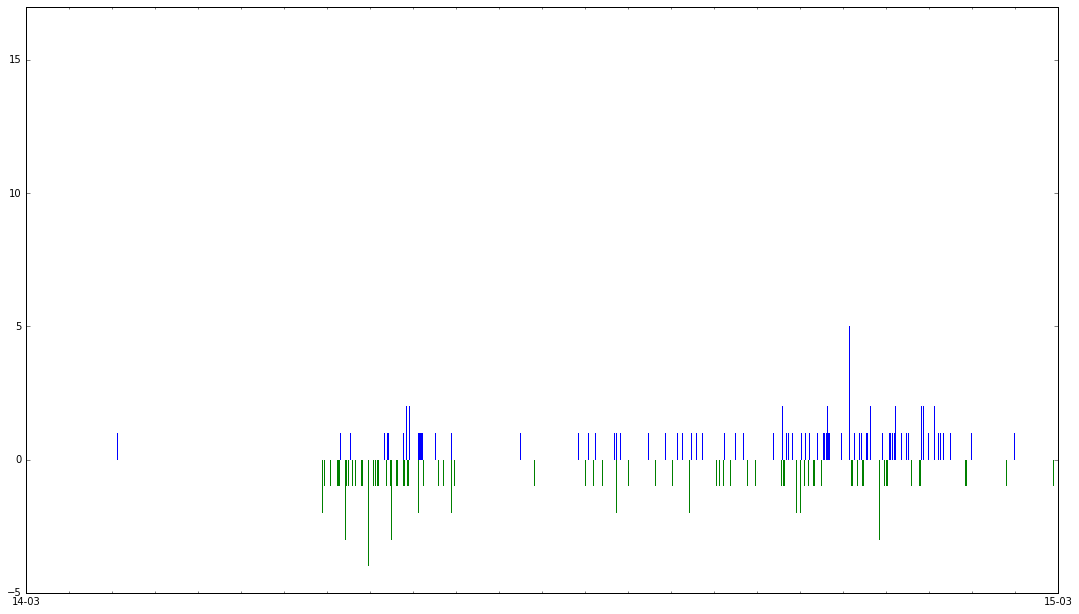

In [59]:
import sqlite3
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline

bd = sqlite3.connect('velib2.db')

c = bd.cursor()
c.execute("select * from station_dyn where num = 10115 and \
db_write_time >= ('13/03/2017') and db_write_time < ('20/03/2017')  order by last_update" )

x=[]
bike=[]
#place=[]
in_flow=[]
out_flow=[]


for line in c:
    x.append(datetime.strptime(line[5], "%d/%m/%Y-%H:%M:%S"))
    #place.append(line[2])
    bike.append(line[3])
    
c.close()



in_flow=[]
out_flow=[]
in_flow.append(0)
out_flow.append(0)

for i in range(len(bike)-1):
    flow=bike[i+1]-bike[i]
    in_flow.append(flow if flow>0 else 0)
    out_flow.append(flow if flow<0 else 0)

    
plt.xlim([datetime.strptime("14/03/2017-00:00:00", "%d/%m/%Y-%H:%M:%S"),datetime.strptime("15/03/2017-00:00:00", "%d/%m/%Y-%H:%M:%S")])
plt.ylim([min(out_flow)-1, max(in_flow)+1])

#plt.step(x, in_flow, label='flux entrant')
#plt.step(x, out_flow, label='flux sortant')

plt.bar(x, in_flow, 0.001, color='blue', linewidth=0)
plt.bar(x, out_flow, 0.001, color='g', linewidth=0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator())

#plt.set_major_formatter(dayFormatter)

#Exemple de rechargement : station 10115 le 16/03/17 à 18h43


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [2]:
### Individualisation des transactions importantes en nombre de vélo

import sqlite3
from datetime import datetime
import time

bd = sqlite3.connect('velib2.db')

c = bd.cursor()
c.execute("select DISTINCT num from station_dyn" )

list_station=[]

for row in c:
    list_station.append(row[0]) 

curiosity=[]
index=5
for i in range(len(list_station)):
    c.execute("select num, last_update, nb_velo_dispo from station_dyn where num = "+str(list_station[i])+" order by last_update" )
    list_row=[]
    for row in c:
        list_row.append((row[0],time.strftime("%d/%m/%Y-%H:%M:%S", time.gmtime(int(row[1])/1000)),row[2]))
    for j in range(1,len(list_row)):
        if abs(list_row[j][2]-list_row[j-1][2])>index:
            curiosity.append([list_row[j-1],list_row[j]])
print len(curiosity)

"""for i in range(len(curiosity)):
    print curiosity[i], "|", curiosity[i][1][1], "|", curiosity[i+1][0][1]"""

#7801 occurences pour index 3  (à partir de 4)
#3534 occurences pour index 4  (à partir de 5)
#1940 occurences pour index 5  (à partir de 6)
#1138 occurences pour index 6  (à partir de 7)
# 759 occurences pour index 7  (à partir de 8)
# 325 occurences pour index 10 (à partir de 11)
# 256 occurences pour index 11 (à partir de 12)

j=0
for i in range(1,len(curiosity)):
    if curiosity[i][0][1]==curiosity[i-1][1][1]:
        j+=1 
        print "****  ",j
        #print curiosity[i-1][1],curiosity[i][0]
        print curiosity[i][1][0], curiosity[i-1][0][1],curiosity[i][0][2]-curiosity[i-1][0][2], curiosity[i][0][1],curiosity[i][1][2]-curiosity[i][0][2],curiosity[i][1][1],curiosity[i][0][2]-curiosity[i-1][0][2]+curiosity[i][1][2]-curiosity[i][0][2] 

c.close()

1940
****   1
1003 15/03/2017-13:47:01 -9 15/03/2017-13:48:23 11 15/03/2017-13:49:18 2
****   2
1003 19/03/2017-22:19:18 -11 19/03/2017-22:20:22 -11 19/03/2017-22:21:22 -22
****   3
1004 19/03/2017-16:25:39 -7 19/03/2017-16:30:58 7 19/03/2017-16:34:45 0
****   4
2009 20/03/2017-14:17:22 -8 20/03/2017-14:18:22 -8 20/03/2017-14:19:21 -16
****   5
5013 17/03/2017-19:54:22 6 17/03/2017-19:55:22 7 17/03/2017-19:56:23 13
****   6
6009 17/03/2017-22:45:14 -6 17/03/2017-22:54:21 6 17/03/2017-22:55:46 0
****   7
7023 19/03/2017-15:50:07 -7 19/03/2017-15:51:11 7 19/03/2017-15:54:20 0
****   8
8009 15/03/2017-03:03:18 -13 15/03/2017-03:04:19 -6 15/03/2017-03:05:23 -19
****   9
8019 15/03/2017-07:06:06 12 15/03/2017-07:08:16 6 15/03/2017-07:10:22 18
****   10
8019 20/03/2017-14:29:25 6 20/03/2017-14:30:23 6 20/03/2017-14:31:14 12
****   11
9004 18/03/2017-15:26:16 6 18/03/2017-15:28:23 7 18/03/2017-15:29:21 13
****   12
9004 19/03/2017-15:11:23 6 19/03/2017-15:12:17 7 19/03/2017-15:13:23 13
****  